## Katrina Hernandez

https://github.com/kahernandez/pythonprojects.git

In [2]:
import numpy as np
import pandas as pd

### 1. Load in the appropriate csv file as a pandas dataframe (batting.csv)

In [3]:
# read batting data into df
df = pd.read_csv('batting.csv')
# preview top 5 rows
df.head()

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,Frank,Abercrombie,1850,1871,1,TRO,NaN,1,4,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,Bob,Addy,1842,1871,1,RC1,NaN,25,118,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,Art,Allison,1849,1871,1,CL1,NaN,29,137,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,Doug,Allison,1846,1871,1,WS3,NaN,27,133,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,Cap,Anson,1852,1871,1,RC1,NaN,25,120,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


In [4]:
# add calculated fields
df['OB'] = df['H']+df['BB']+df['IBB']+df['SH']+df['SF']
df['OBP'] = df['OB']/df['AB']
df['PA']= df['AB']+df['BB']+df['IBB']+df['SH']+df['SF']

### 2. Print out the dimensions and info about the dataframe you just created

In [7]:
# print dimension names
print(df.columns)
# print info on df
print(df.info())

Index(['playerID', 'nameFirst', 'nameLast', 'birthYear', 'yearID', 'stint',
       'teamID', 'lgID', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB',
       'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'OB', 'OBP', 'PA'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 28 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102079 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102392 non-null float64
SB           101516 non-null float64
CS           79360 non-null flo

### 3.How many players have hit 40 or more HRs in one single season? (Number only)

In [8]:
# establish column with playerID + year for lookup
df['player_year'] = df['playerID'] + " " + df['yearID'].map(str)

In [9]:
# make that count distinct- player will only appear once even if he has had >1 40+ HR season
df.groupby(['player_year']).filter(lambda x: x.HR.sum()>=40)[['playerID']].nunique()

playerID    142
dtype: int64

### 4. How many players have hit more than 600 HRs for their career? (Dataframe)

In [12]:
# Group the df by playerID and sum HR
player_HR = df.groupby(['playerID'], as_index = False).agg({'nameFirst': 'first', 'nameLast': 'first', 'birthYear': 'first', 'HR': sum})
# Filter to HR sum of greater than 600
player_HR[player_HR['HR'] > 600].sort_values(by='HR', ascending = False)

,playerID,nameFirst,nameLast,birthYear,HR
1542,bondsba01,Barry,Bonds,1964,762
1,aaronha01,Hank,Aaron,1934,755
14865,ruthba01,Babe,Ruth,1895,714
14528,rodrial01,Alex,Rodriguez,1975,696
10857,mayswi01,Willie,Mays,1931,660
6633,griffke02,Ken,Griffey,1969,630
17004,thomeji01,Jim,Thome,1970,612
16103,sosasa01,Sammy,Sosa,1968,609


### 5. How many players have hit 40 2Bs, 10 3Bs, 200 Hits, and 30 HRs (inclusive) in one season? (Number Only)

In [13]:
# sum 2Bs, 3Bs, Hs and HRs by player_year
player_stat = df.groupby(['player_year']).agg({'playerID': 'first', '2B': sum, '3B': sum, 'H': sum, 'HR': sum})
# filter and count unique player IDs
player_stat[(player_stat['2B'] >= 40) & (player_stat['3B'] >= 10) & (player_stat['H'] >= 200) & (player_stat['HR'] >= 30)]['playerID'].nunique()

11

### 6. How many players have had 100 or more SBs in a season? (Dataframe)

In [20]:
# aggregate stolen bases by player and season
sb_season = df.groupby(['player_year']).agg({'yearID': 'first', 'playerID': 'first', 'nameFirst': 'first', 'nameLast': 'first', 'birthYear': 'first', 'SB': sum})
# pull player and season with more than 100 SBs
sb_season[sb_season['SB']>=100]

,yearID,playerID,nameFirst,nameLast,birthYear,SB
player_year,,,,,,
brocklo01 1974,1974,brocklo01,Lou,Brock,1939,118.0
brownpe01 1887,1887,brownpe01,Pete,Browning,1861,103.0
brownto01 1891,1891,brownto01,Tom,Brown,1860,106.0
colemvi01 1985,1985,colemvi01,Vince,Coleman,1961,110.0
colemvi01 1986,1986,colemvi01,Vince,Coleman,1961,107.0
colemvi01 1987,1987,colemvi01,Vince,Coleman,1961,109.0
comisch01 1887,1887,comisch01,Charlie,Comiskey,1859,117.0
fogarji01 1887,1887,fogarji01,Jim,Fogarty,1864,102.0
hamilbi01 1889,1889,hamilbi01,Billy,Hamilton,1866,111.0


### 7. How many players in the 1960s have hit more than 200 HRs? (Dataframe)

In [23]:
# all HRs in dataframe occured b/w 1960 and 1969
players60 = df[(df.yearID >= 1960) & (df.yearID < 1970)]
## HR by player
players60_stat = players60.groupby(['playerID'], as_index = False).agg({'nameFirst': 'first', 'nameLast': 'first', 'birthYear': 'first', 'HR': sum})
# filter and sort
players60_stat[players60_stat['HR'] > 200].sort_values('HR', ascending = False)

,playerID,nameFirst,nameLast,birthYear,HR
856,killeha01,Harmon,Killebrew,1936,393
0,aaronha01,Hank,Aaron,1934,375
1044,mayswi01,Willie,Mays,1931,350
1372,robinfr02,Frank,Robinson,1935,316
1057,mccovwi01,Willie,McCovey,1938,300
751,howarfr01,Frank,Howard,1936,288
279,cashno01,Norm,Cash,1934,278
70,bankser01,Ernie,Banks,1931,269
1009,mantlmi01,Mickey,Mantle,1931,256
283,cepedor01,Orlando,Cepeda,1937,254


### 8. Who has hit the most HRs in history? (Dataframe)

In [24]:
player_HR.set_index(player_HR['HR'])
player_HR.sort_values(by='HR', ascending = False)[:1]

,playerID,nameFirst,nameLast,birthYear,HR
1542,bondsba01,Barry,Bonds,1964,762


### 9. Who had the most hits in the 1970s? (Dataframe)

In [26]:
# all HRs in dataframe occured b/w 1960 and 1969
players70 = df[(df.yearID >= 1970) & (df.yearID < 1980)]
# sum of H by player ID
player_H70 = players70.groupby(['playerID'], as_index = False).agg({'nameFirst': 'first', 'nameLast': 'first', 'birthYear': 'first', 'H': sum})
# max H
player_H70.sort_values(by='H', ascending = False)[:1]

,playerID,nameFirst,nameLast,birthYear,H
1639,rosepe01,Pete,Rose,1941,2045


### 10. Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  (Dataframe)

In [31]:
# aggregate for player in 1977
season1977 = df[df['yearID'] == 1977]
season1977 = season1977.groupby(season1977['player_year'], as_index = False).agg({'nameFirst':'first', 'nameLast':'first', 'birthYear':'first', 'OB':sum, 'AB':sum, 'PA':sum})
# add OBP calculation
season1977['OBP'] = season1977['OB']/season1977['AB']
# filter and sort
season1977[season1977['PA']>=500].sort_values(by='OBP', ascending = False).head(5)

,player_year,nameFirst,nameLast,birthYear,OB,AB,PA,OBP
745,singlke01 1977,Ken,Singleton,1947,302.0,536,662.0,0.563433
752,smithre06 1977,Reggie,Smith,1945,273.0,488,611.0,0.559426
800,tenacge01 1977,Gene,Tenace,1946,243.0,437,578.0,0.556064
334,hargrmi01 1977,Mike,Hargrove,1949,284.0,525,649.0,0.540952
135,carewro01 1977,Rod,Carew,1945,329.0,616,706.0,0.534091


### 11. Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe)

In [33]:
season2013 = df[df['yearID'] == 2013]
player_2013 = season2013.groupby(['playerID'], as_index = False).agg({'yearID':'first', 'nameFirst':'first', 'nameLast':'first', 'birthYear':'first', 'PA':sum, 'H':sum, 'AB':sum})
# add formula for batting average
player_2013['aver'] = player_2013['H']/player_2013['AB']
# limit to 300+ plate appearances
player_2013[(player_2013['PA']>= 300)].sort_values(by='aver', ascending = False).head(8)

,playerID,yearID,nameFirst,nameLast,birthYear,PA,H,AB,aver
167,cabremi01,2013,Miguel,Cabrera,1983,666.0,193,555,0.347748
980,ramirha01,2013,Hanley,Ramirez,1983,336.0,105,304,0.345395
269,cuddymi01,2013,Michael,Cuddyer,1979,543.0,162,489,0.331288
759,mauerjo01,2013,Joe,Mauer,1983,515.0,144,445,0.323596
1196,troutmi01,2013,Mike,Trout,1991,717.0,190,589,0.322581
595,johnsch05,2013,Chris,Johnson,1984,550.0,165,514,0.321012
398,freemfr01,2013,Freddie,Freeman,1989,632.0,176,551,0.319419
962,puigya01,2013,Yasiel,Puig,1990,427.0,122,382,0.319372


### 12.Leaders in hits from 1940 up to and including 1949. (Dataframe)

In [34]:
# limit to 2013 with 300+ plate appearances
players40 = df[(df.yearID >= 1940) & (df.yearID < 1950)]
hits40 = players40.groupby(['playerID'], as_index = False).agg({'nameFirst':'first', 'nameLast':'first', 'birthYear':'first', 'H':sum})
hits40.sort_values(by='H', ascending = False).head()

,playerID,nameFirst,nameLast,birthYear,H
138,boudrlo01,Lou,Boudreau,1917,1578
427,elliobo01,Bob,Elliott,1916,1563
1576,walkedi02,Dixie,Walker,1910,1512
1103,musiast01,Stan,Musial,1920,1432
390,doerrbo01,Bobby,Doerr,1918,1407


### 13. Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number) 

In [64]:
# aggregate H by player and year
hits = df.groupby(['player_year']).agg({'yearID': 'first', 'playerID': 'first', 'nameFirst': 'first', 'nameLast':'first', 'birthYear': 'first', 'H': sum})
# rank players according to hits by year
hits.hit_rank = hits.assign(rnk = hits.groupby(['yearID'])['H'].rank(method='first', ascending = False))
# determine leader for each year
h_leaders = hit_rank[(hit_rank['rnk'] == 1)]
# aggregated times led by player
times_led_h = h_leaders.groupby(['playerID']).agg({'nameFirst': 'first', 'nameLast':'first', 'birthYear': 'first', 'rnk': sum})
times_led_h.sort_values('rnk', ascending = False).head(1)

,nameFirst,nameLast,birthYear,rnk
playerID,,,,
cobbty01,Ty,Cobb,1886,7.0


### 14. Which players have played the most games for their careers?  Top 5, descending by games played presented as a dataframe

In [65]:
games = df.groupby(['playerID']).agg({'nameFirst':'first', 'nameLast':'first', 'birthYear':'first', 'G':sum})
games.sort_values(by='G', ascending= False).head(5)

,nameFirst,nameLast,birthYear,G
playerID,,,,
rosepe01,Pete,Rose,1941,3562
yastrca01,Carl,Yastrzemski,1939,3308
aaronha01,Hank,Aaron,1934,3298
henderi01,Rickey,Henderson,1958,3081
cobbty01,Ty,Cobb,1886,3035


### 15. How many players have had more than 3000 hits for their careers while also hitting 500 or more HRs?  Just a number is okay here

In [67]:
h_hr = df.groupby(['playerID'], as_index = False).agg({'nameFirst':'first', 'nameLast':'first', 'birthYear':'first', 'H':sum, 'HR':sum})
h_hr[(h_hr['HR']>=500) & (h_hr['H']>3000)]['playerID'].nunique()

5

### 16. How many HRs were hit during the entire 1988 season?  Just a number is okay here

In [68]:
df88 = df[df['yearID'] == 1988]
df88['HR'].sum()

3180

### 17. Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 ABs.  I would like a dataframe sorted by average.

In [69]:
player_aver = df.groupby(['player_year'], as_index = False).agg({'yearID':'first', 'playerID':'first', 'nameFirst':'first', 'nameLast':'first', 'birthYear':'first', 'AB':sum, 'H':sum})
wade = player_aver[(player_aver['nameFirst'] == "Wade") & (player_aver['nameLast'] == "Boggs") & (player_aver['AB'] >= 500)]
wade['average'] = wade['H']/wade['AB']
wade.sort_values('average', ascending = False).head(3)

C:\Users\katri\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,player_year,yearID,playerID,nameFirst,nameLast,birthYear,AB,H,average
7592,boggswa01 1985,1985,boggswa01,Wade,Boggs,1958,653,240,0.367534
7595,boggswa01 1988,1988,boggswa01,Wade,Boggs,1958,584,214,0.366438
7594,boggswa01 1987,1987,boggswa01,Wade,Boggs,1958,551,200,0.362976


### 18. Please filter out the top OBPs for the 1995 season with at least 400 PAs, sorted by OBP.  I would like a dataframe for this

In [70]:
season1995 = df[df['yearID'] == 1995]
player_1995 = season1995.groupby(['playerID'], as_index = False).agg({'yearID':'first', 'nameFirst':'first', 'nameLast':'first', 'birthYear':'first', 'OB':sum, 'AB':sum, 'PA':sum})
#filter
player_1995['OBP'] = player_1995['OB']/player_1995['AB']
player_1995[player_1995['PA']>=400].sort_values(by='OBP', ascending = False).head(5)

,playerID,yearID,nameFirst,nameLast,birthYear,OB,AB,PA,OBP
1002,thomafr04,1995,Frank,Thomas,1968,329.0,493,670.0,0.667343
628,martied01,1995,Edgar,Martinez,1963,321.0,511,650.0,0.628180
659,mcgwima01,1995,Mark,McGwire,1963,186.0,317,416.0,0.586751
107,bondsba01,1995,Barry,Bonds,1964,295.0,506,652.0,0.583004
235,davisch01,1995,Chili,Davis,1960,245.0,424,534.0,0.577830


### 19. Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  I would like a dataframe with just the leader 

In [71]:
# select years
seasons = df[(df['yearID'] == 1922) | (df['yearID'] == 1925) | (df['yearID'] == 1926) | (df['yearID'] == 1928)]
# sort players by sum of 3Bs and select player with max total 3Bs
seasons.groupby(['playerID'], as_index = False).agg({'nameFirst':'first', 'nameLast':'first', '3B':sum}).sort_values('3B', ascending = False).head(1)

,playerID,nameFirst,nameLast,3B
1011,walkecu01,Curt,Walker,59


### 20. How many players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  A number is okay here

In [72]:
#dataframe of home runs and stolen bases by player and season
player_hrsb = df.groupby(['player_year'], as_index = False).agg({'yearID':'first', 'playerID':'first', 'nameFirst':'first', 'nameLast':'first', 'birthYear':'first', 'HR':sum, 'SB':sum})
#filter
player_hrsb[(player_hrsb['HR']>=30) & (player_hrsb['SB']>=30)]['playerID'].nunique()

38

### 21. Who had the highest OBP is 1986 with at least 400 PAs? (Dataframe)

In [73]:
season1986 = df[df['yearID'] == 1986]
player_1986 = season1986.groupby(['playerID'], as_index = False).agg({'yearID':'first', 'nameFirst':'first', 'nameLast':'first', 'birthYear':'first', 'OB':sum, 'AB':sum, 'PA':sum})
#filter
player_1986['OBP'] = player_1986['OB']/player_1986['AB']
player_1986[player_1986['PA']>=400].sort_values(by='OBP', ascending = False).head(1)

,playerID,yearID,nameFirst,nameLast,birthYear,OB,AB,PA,OBP
78,boggswa01,1986,Wade,Boggs,1958,334.0,580,707.0,0.575862


### 22. Who in the NL had the highest OBP is 1997 with at least 400 PAs? (Dataframe)

In [74]:
nl1997 = df[(df['yearID'] == 1997) & (df['lgID'] == 'NL')]
player_nl1977 = nl1997.groupby(['playerID'], as_index = False).agg({'yearID':'first', 'nameFirst':'first', 'nameLast':'first', 'birthYear':'first', 'OB':sum, 'AB':sum, 'PA':sum})
#filter
player_nl1977['OBP'] = player_nl1977['OB']/player_nl1977['AB']
player_nl1977[player_nl1977['PA']>=400].sort_values(by='OBP', ascending = False).head(1)

,playerID,yearID,nameFirst,nameLast,birthYear,OB,AB,PA,OBP
60,bondsba01,1997,Barry,Bonds,1964,339.0,532,716.0,0.637218


 ### 23. Who had more than the league average HRs in 2012 (filter out all players with less 500 PAs)? (Dataframe)

In [9]:
season_2012 = df[(df['yearID'] == 2012)]
player_2012 = season_2012.groupby(['playerID'], as_index = False).agg({'nameFirst':'first', 'nameLast': 'first', 'birthYear':'first', 'PA':sum, 'HR':sum})
player_2012 = player_2012[(player_2012['PA']>500)]
player_2012[player_2012['HR']>player_2012['HR'].mean()]

,playerID,nameFirst,nameLast,birthYear,PA,HR
20,alvarpe01,Pedro,Alvarez,1987,591.0,30
82,beltrad01,Adrian,Beltre,1979,657.0,36
83,beltrca01,Carlos,Beltran,1977,632.0,32
119,braunry02,Ryan,Braun,1983,681.0,41
130,bruceja01,Jay,Bruce,1987,640.0,34
148,butlebi03,Billy,Butler,1986,681.0,29
156,cabremi01,Miguel,Cabrera,1983,711.0,44
165,canoro01,Robinson,Cano,1982,700.0,33
201,cespeyo01,Yoenis,Cespedes,1985,538.0,23
254,craigal01,Allen,Craig,1984,514.0,22


### 24. Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe)

In [124]:
# age of player in season
player_hrsb['player_age'] = player_hrsb['yearID']-player_hrsb['birthYear']
# 50+ HRs
hr50 = player_hrsb[(player_hrsb['HR']>=50)]
# sort youngest to oldest
hr50.sort_values(by='player_age').head(1)

,player_year,yearID,playerID,nameFirst,nameLast,birthYear,HR,SB,player_age
26282,fieldpr01 2007,2007,fieldpr01,Prince,Fielder,1984,50,2.0,23


### 25. Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe)

In [98]:
df['player_age'] = df['yearID']-df['birthYear']
young = df.groupby(['player_year'], as_index = False).agg({'playerID':'first','nameFirst': 'first', 'nameLast': 'first', 'player_age':'first', 'yearID': 'first', 'HR': sum})
young = young.groupby(by= ['playerID', 'yearID', 'player_age']).sum().groupby(level=[0]).cumsum()
young = young[young['HR']>=300]
young.reset_index(level=2, inplace=True)
young['rnk'] = young.groupby(['playerID'])['player_age'].rank(method='first')
young = young[(young['rnk'] == 1)]
young.reset_index(level=1, inplace=True)
young.reset_index(level=0, inplace=True)
young = young.sort_values(by='player_age').head(5)
young = pd.DataFrame(young, columns = ['playerID', 'player_age', 'yearID'])
young

,playerID,player_age,yearID
46,foxxji01,28,1935
98,ottme01,28,1937
105,pujolal01,28,2008
69,jonesan01,28,2005
111,rodrial01,28,2003


### Bonus #1 Graph total HRs per season using bar graph

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline

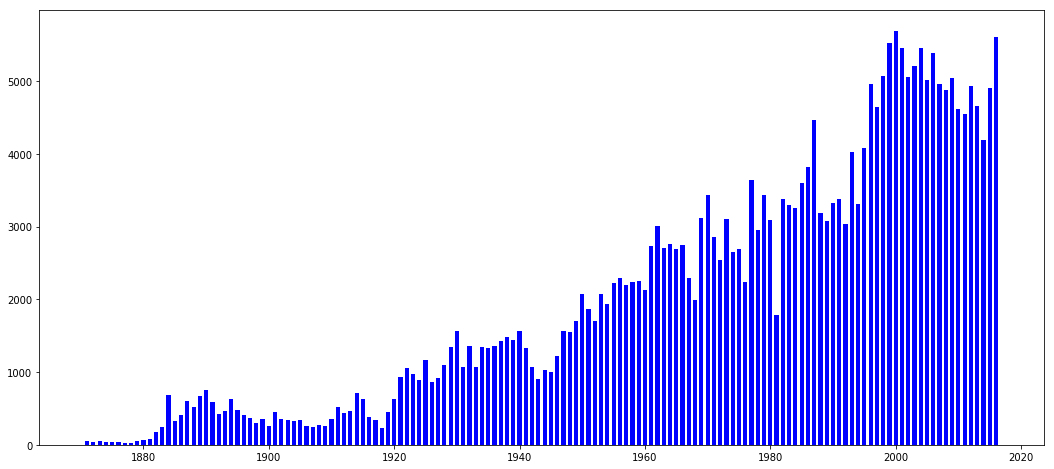

In [101]:
chart = df.groupby(['yearID'], as_index = False).agg({'HR':sum})

plt.figure(figsize=(18, 8))
y = chart['HR']
N = len(y)
x = chart['yearID']
width = 1/1.5
fig = plt.bar(x, y, width, color="blue")
fig = plt.gcf()

### Bonus #2 Using a line graph please graph the average HRs per AB (think about this) per season

In [110]:
chart2 = df.groupby(by = ['yearID'], as_index = False).agg({'HR':sum, 'AB': sum})
chart2['averHR'] = chart2['HR']/chart2['AB']

In [111]:
chart2.head()

,yearID,HR,AB,averHR
0,1871,47,10822,0.004343
1,1872,35,15679,0.002232
2,1873,46,16974,0.002710
3,1874,40,19104,0.002094
4,1875,40,26833,0.001491


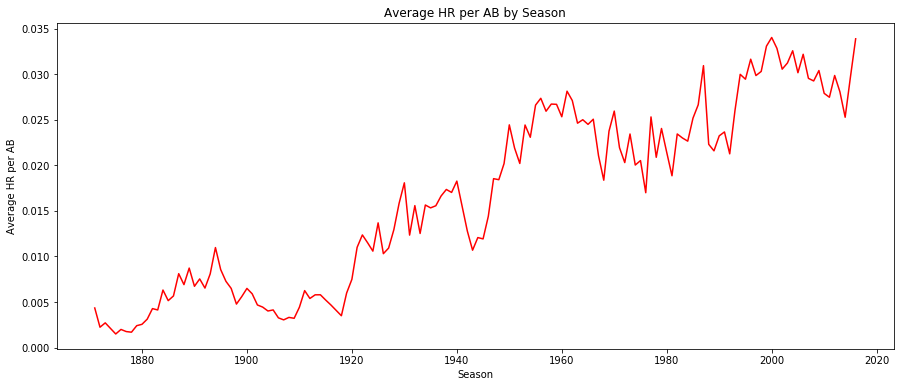

In [116]:
fig, axes = plt.subplots(figsize=(15,6))

axes.plot(chart2['yearID'], chart2['averHR'], 'r')
axes.set_xlabel('Season')
axes.set_ylabel('Average HR per AB')
axes.set_title('Average HR per AB by Season');